In [9]:
import numpy as np
import matplotlib.pyplot as plt ### ou encore from matplotlib import pyplot as plt
### permet de faire des zoom, des recadrages grâce à la souris : 
%matplotlib notebook
%matplotlib inline



import importlib
###  les fonctions de codage/décodage WAV : 
from scipy.io import wavfile as io
from IPython.display import Audio


from IPython.display import display, Math, Latex
from scipy.fftpack import fft, fftshift


In [10]:
Fe, data = io.read('Domine_quando_veneris_debut.wav')
print('fréquence échantillonnage (Hz)= '+str(Fe))



print(np.shape(data))
x = (data[:,0]+data[:,1] )/2 ### conversion en mono

x=x/32000   ### sinon valeurs du signal trop grandes

begin_echan_signal1 = int(np.round(1.5 * Fe) - 1)
end_echan_signal1 = int(np.round(2.5 * Fe) - 1)
begin_echan_signal2 = int(np.round(6.5 * Fe) - 1)
end_echan_signal2 = int(np.round(7.5 * Fe) - 1)

signal1 = x[begin_echan_signal1:end_echan_signal1]
signal2 = x[begin_echan_signal2:end_echan_signal2]

N1= len(signal1)
N2= len(signal2)

PuissanceN1 = np.sum(np.square(signal1))/N1
PuissanceN2 = np.sum(np.square(signal2))/N2

print(PuissanceN1)
print(PuissanceN2)

fréquence échantillonnage (Hz)= 44100
(1173276, 2)
0.004260093045103459
0.00672557639972851


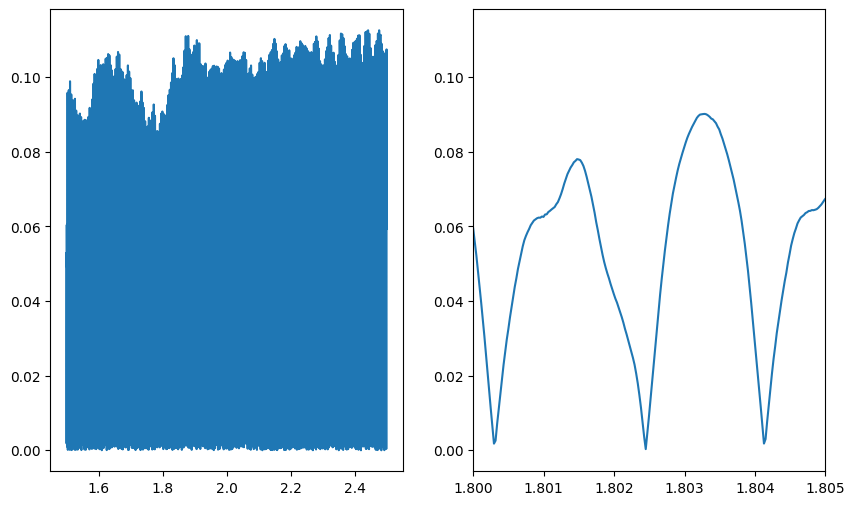

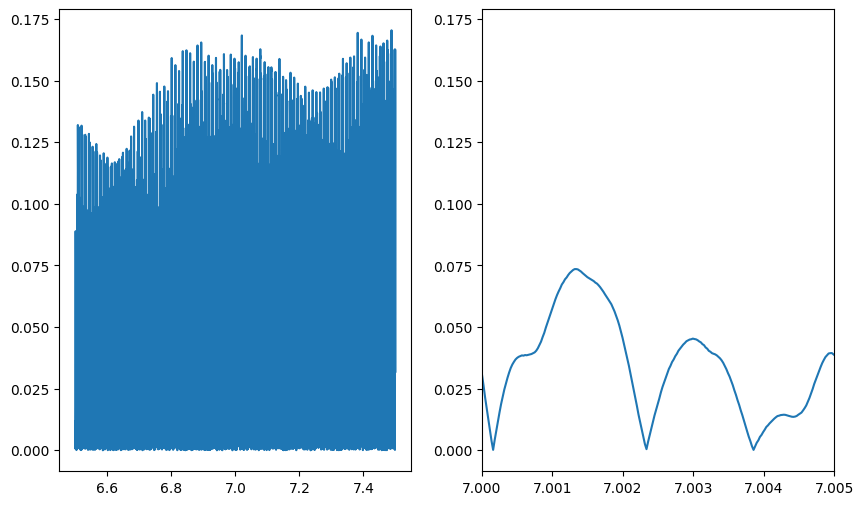

In [11]:
# graph 1 - signal 1
temps1=np.arange(1.5,2.5,1/44100)

plt.figure(1,figsize=(10,6))
plt.clf()

plt.subplot(121)
plt.plot(temps1,np.abs(signal1))
plt.subplot(122)
plt.plot(temps1,np.abs(signal1))
plt.xlim(1.8,1.805)
plt.show()


temps2=np.arange(6.5,7.5,1/44100)

plt.figure(1,figsize=(10,6))
plt.clf()

plt.subplot(121)
plt.plot(temps2,np.abs(signal2))
plt.subplot(122)
plt.plot(temps2,np.abs(signal2))
plt.xlim(7,7.005)
plt.show()


In [14]:
son_signal1 = Audio(signal1, rate=Fe)
son_signal2 = Audio(signal2, rate=Fe)
display(son_signal1)
display(son_signal2)

Oui les deux parties sont stationnaires

(0.0, 4000.0)

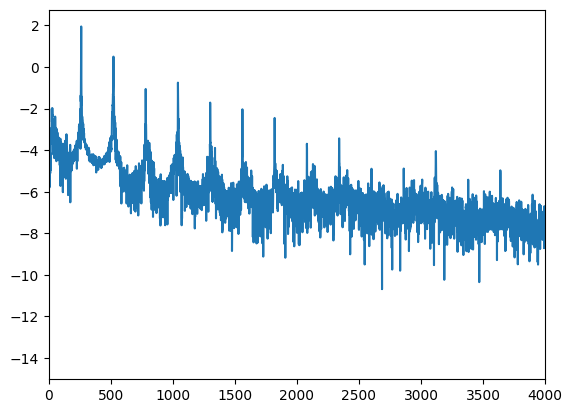

In [24]:
fft_signal1 = fft(signal1)

periodogram = np.abs(fft_signal1)**2/N1

plt.plot(np.log10(periodogram))
plt.xlim(0, 4000)